# Módulo: MODELOS DE INTELIGENCIA ARTIFICIAL
## Ejercicio práctico 1.
## Sistema Basado en Reglas   
### Análisis de la calidad del aire

De forma similar a lo realizado en el notebook SBR_IRIS, construye un sistema de clasificación de la calidad del aire (AirQuality - AQI) en función de la cantidad de Ozono detectado en el mismo.   
Los valores del nivel de AQI se muestran en la siguiente tabla:  


| NIVEL AQI | RANGO-DESCRIPCIÓN|
|:---------:|:----------------:|
|   BUENO   |     0 - 50       |
| MODERADO  |    51 - 100      |
|CONTAMINADO|   101 - 150      |
|  INSANO   |   151 - 200      |
| PELIGROSO |       > 200      |

Se pide intentar establecer la clasificación según la tabla anterior en base a alguna de las características que conforman el dataset (Valor de O2, Valor de CO, Valor de NO2, Valor de PM2.5, Longitud y Latitud).   
Como los datos son numéricos y no faltan valores, no se requiere ningún procesamiento previo.   

Nuestro objetivo es predecir el AQI, por lo que esta tarea sería de clasificación o de regresión, pero en este caso vamos a tratar de establecer un SBR basado en una de las variables independientes citadas.

<u>Nota sobre la característica ***PM2.5***</u> :   
Este valor se corresponde con la concentración del material particulado (*PM - Particulate Matter*) de la fracción de tamaño PM2,5 (2.5 micrometros), el cúal se encuentra íntimamente asociado a problemas de salud dado que entre sus efectos aparecen impactos claros sobre las enfermedades cardiacas y pulmonares.   

### Importamos librerías necesarias

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# Ocultamos los warnings de las librerías
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------

### Cargamos dataset *airquality.csv*

In [38]:
# Cargamos el dataset
data = pd.read_csv('datasets/airquality.csv')

### Mostramos los primeros registros

In [39]:
data.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


### Asignación (mapeo) del nivel de calidad según los valores del mismo

In [40]:
def clasificar_calidad_aire(calidad_aire):
    if calidad_aire > 200:
        return "Peligroso"
    elif calidad_aire > 151:
        return "Insano"
    elif calidad_aire > 101:
        return "Contaminado"
    elif calidad_aire > 51:
        return "Moderado"
    else:
        return "Bueno"

### Análisis breve del dataset (EDA)

In [41]:
data.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [42]:
print("Numero de registros (filas):", data.shape[0])
print("Tipos de los datos")
data.dtypes

Numero de registros (filas): 16695
Tipos de los datos


AQI Value            int64
CO AQI Value         int64
Ozone AQI Value      int64
NO2 AQI Value        int64
PM2.5 AQI Value      int64
lat                float64
lng                float64
dtype: object

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB


In [44]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


Hacemos la separaceion de datos en datos de entrenmo y datos de Testeo

In [45]:
data_train, data_test =  train_test_split(data, test_size=0.2)


Revisamos los datos de entreno y nos aseguramos que no haya duplicados

In [46]:
data_train.info()
data_train[data_train.duplicated(keep=False)]


<class 'pandas.core.frame.DataFrame'>
Index: 13356 entries, 3818 to 5544
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        13356 non-null  int64  
 1   CO AQI Value     13356 non-null  int64  
 2   Ozone AQI Value  13356 non-null  int64  
 3   NO2 AQI Value    13356 non-null  int64  
 4   PM2.5 AQI Value  13356 non-null  int64  
 5   lat              13356 non-null  float64
 6   lng              13356 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 834.8 KB


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng


Visualizacion de los datos de entreno

<Axes: xlabel='AQI Value', ylabel='Count'>

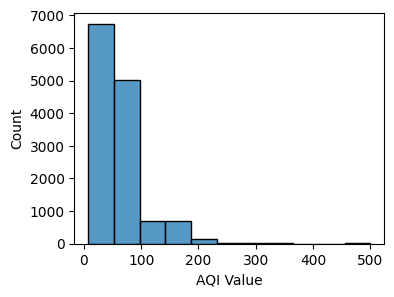

In [47]:
plt.figure(figsize=(4,3))
sns.histplot(data=data_train, x='AQI Value', bins=11)

<Axes: xlabel='CO AQI Value', ylabel='Count'>

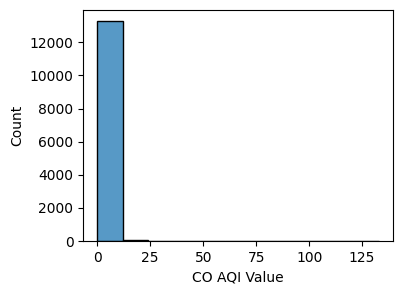

In [48]:
plt.figure(figsize=(4,3))
sns.histplot(data=data_train, x='CO AQI Value', bins=11)

<Axes: xlabel='Ozone AQI Value', ylabel='Count'>

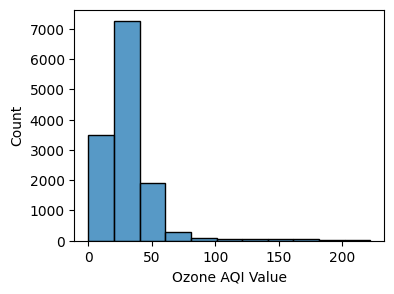

In [49]:
plt.figure(figsize=(4,3))
sns.histplot(data=data_train, x='Ozone AQI Value', bins=11)

<Axes: xlabel='NO2 AQI Value', ylabel='Count'>

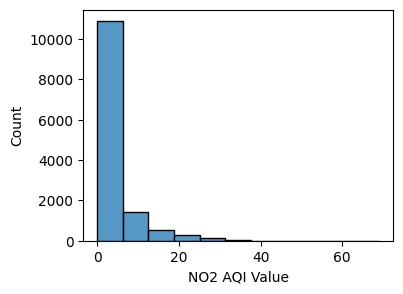

In [50]:
plt.figure(figsize=(4,3))
sns.histplot(data=data_train, x='NO2 AQI Value', bins=11)

<Axes: xlabel='PM2.5 AQI Value', ylabel='Count'>

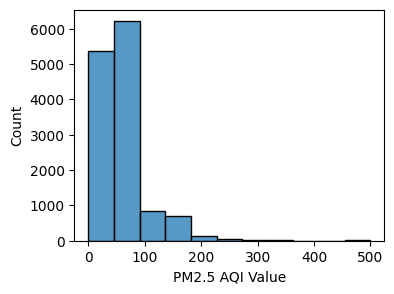

In [51]:
plt.figure(figsize=(4,3))
sns.histplot(data=data_train, x='PM2.5 AQI Value', bins=11)

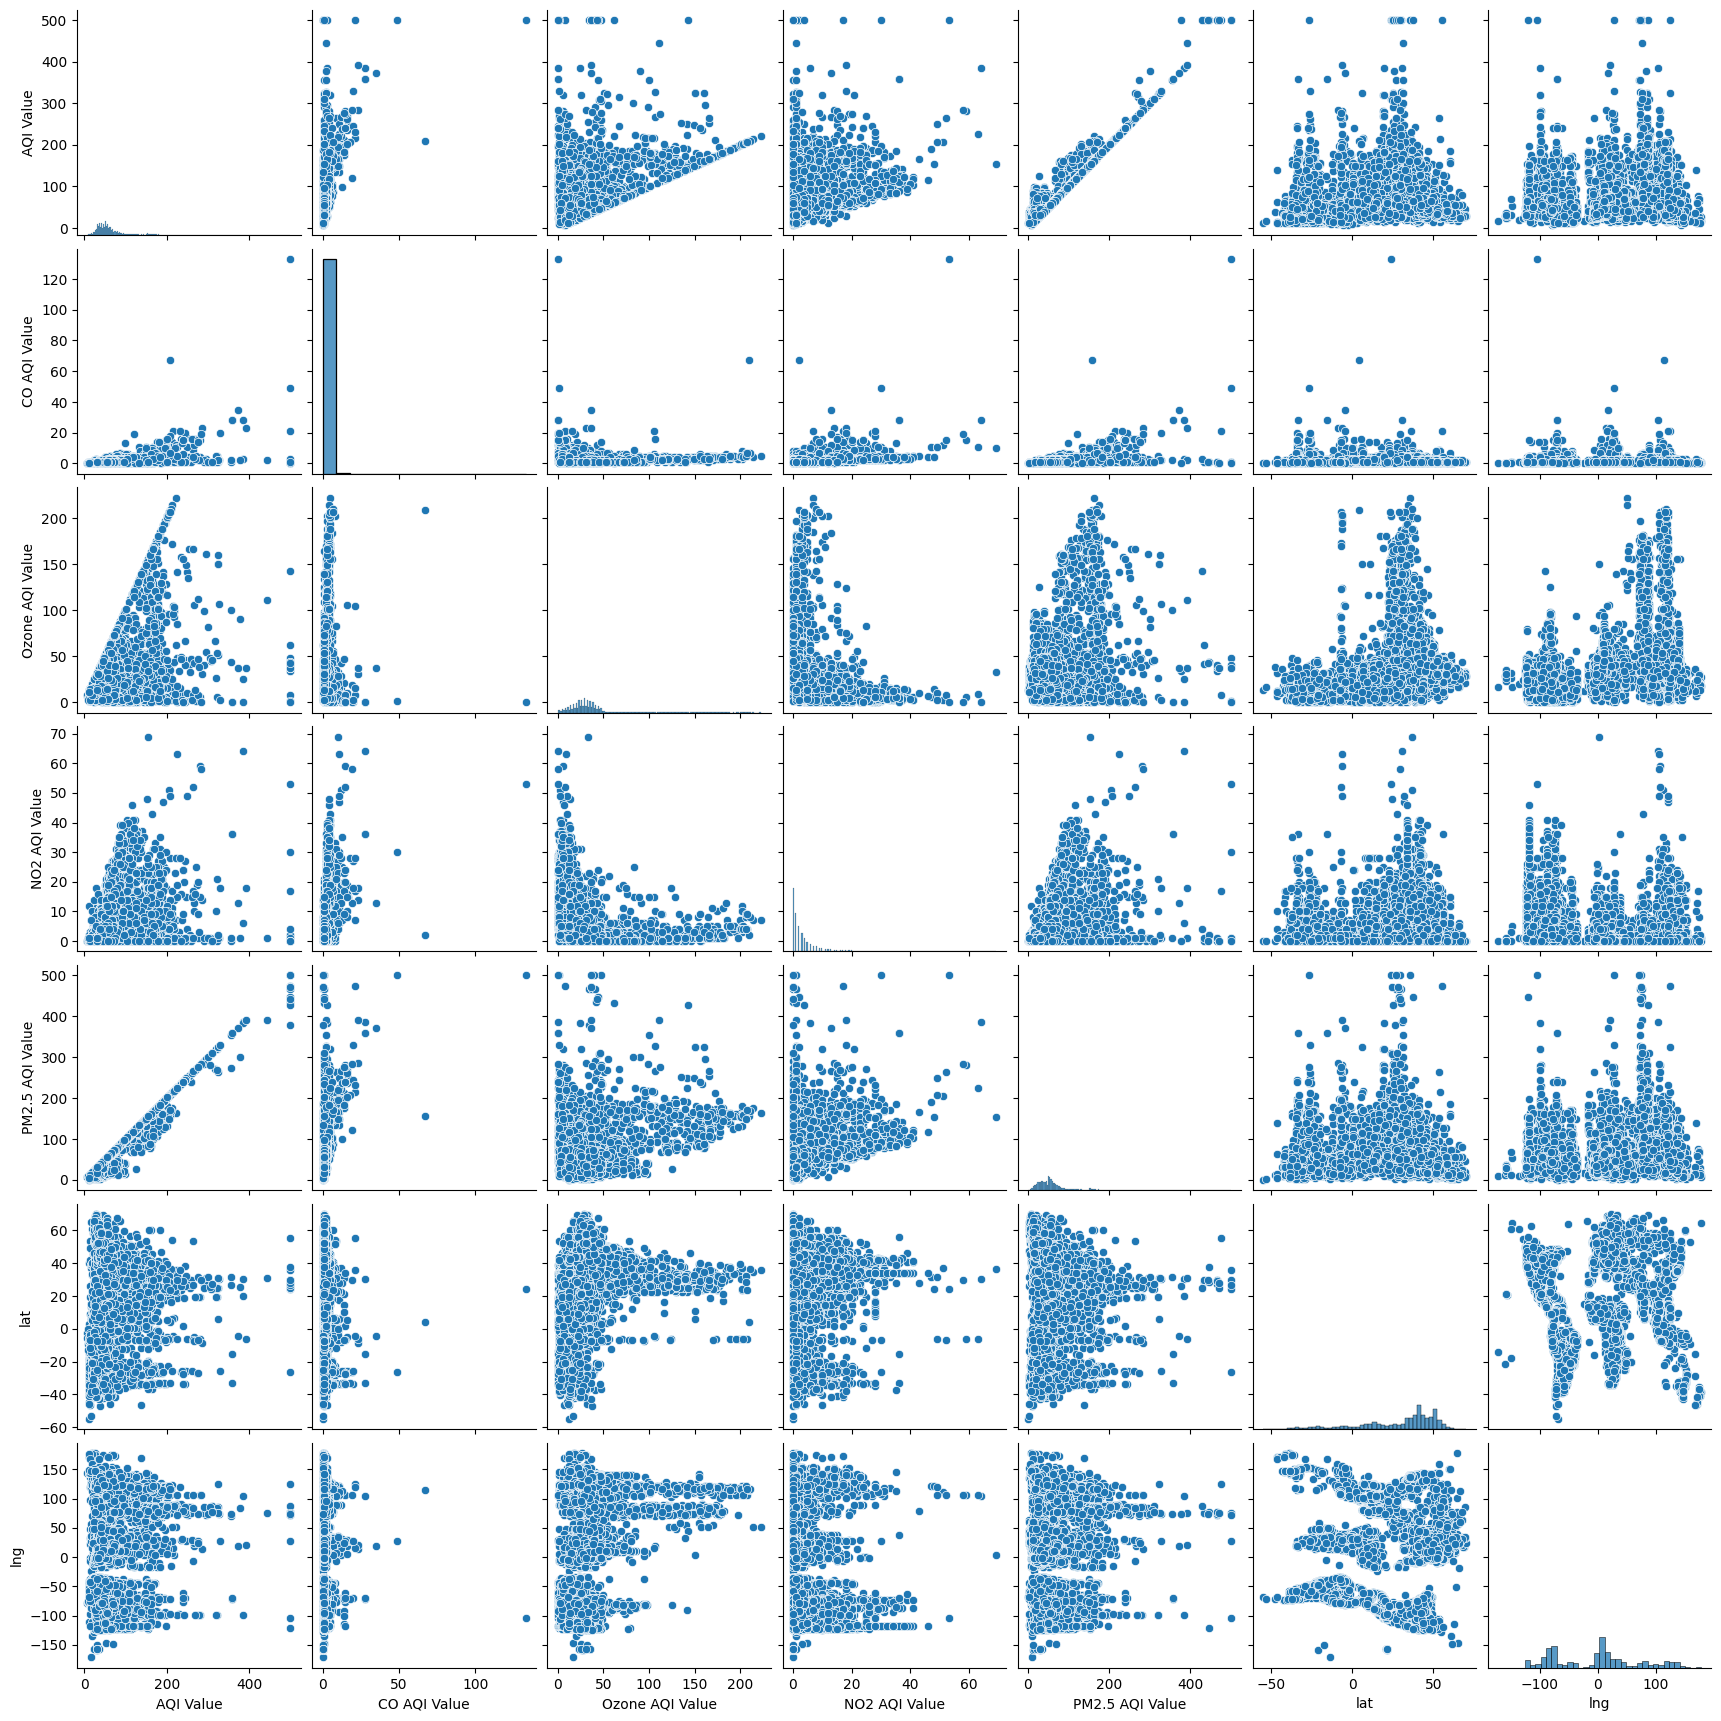

In [52]:
sns.pairplot(data_train)

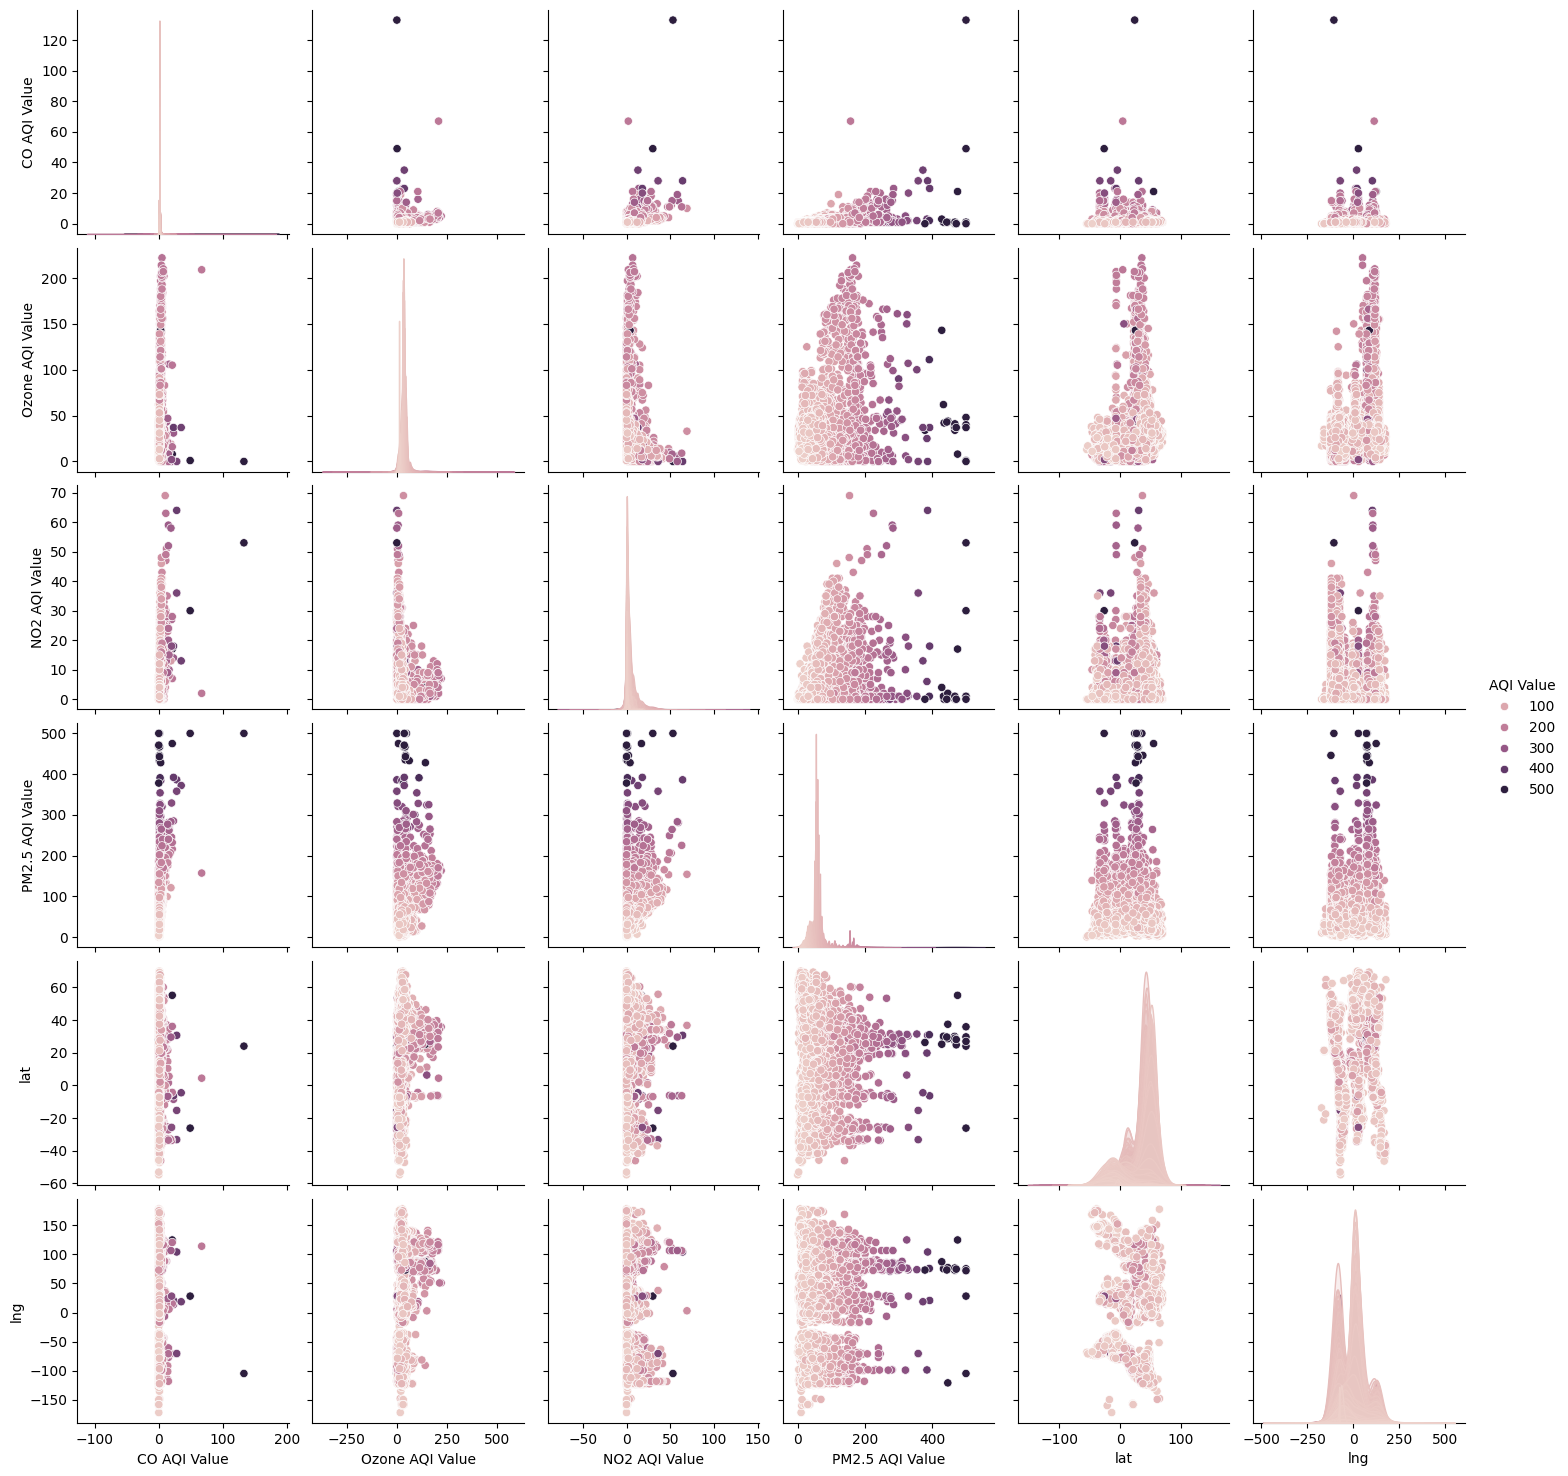

In [53]:
sns.pairplot(data_train, hue='AQI Value')

### Definición de reglas

### Aplicación de reglas

### Visualización gráfica